In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("data_graphs.csv")

In [20]:
# New column headers
new_column_headers = [
    'epoch',
    'self.action',
    'self.green_percent',
    'self.last_green_percent',
    'reward',
    'last_reward',
    'collected_food'
]

# Setting the new column headers
df.columns = new_column_headers

In [21]:
df

,epoch,self.action,self.green_percent,self.last_green_percent,reward,last_reward,collected_food
0,0,1,0.000000,0.000000,-0.000000,-0.000000,0
1,0,1,0.000000,0.000000,-2.757890,-0.000000,0
2,0,1,0.000000,0.000000,-2.756308,-0.000000,0
3,0,2,0.000000,0.000000,-2.756405,-0.000000,0
4,0,1,0.000000,0.000000,-2.756892,-0.000000,0
...,...,...,...,...,...,...,...
2732,24,2,0.843750,0.843750,4.218750,3.784660,0
2733,24,2,0.711889,0.843750,3.559446,4.779029,0
2734,24,1,0.851768,0.711889,4.258841,4.889515,0
2735,24,2,0.723124,0.851768,3.615621,5.000000,0


In [22]:
# Separate rows with epoch == 0 as baseline
baseline_df = df[df['epoch'] == 0]

# Separate the remaining rows
remaining_df = df[df['epoch'] != 0]

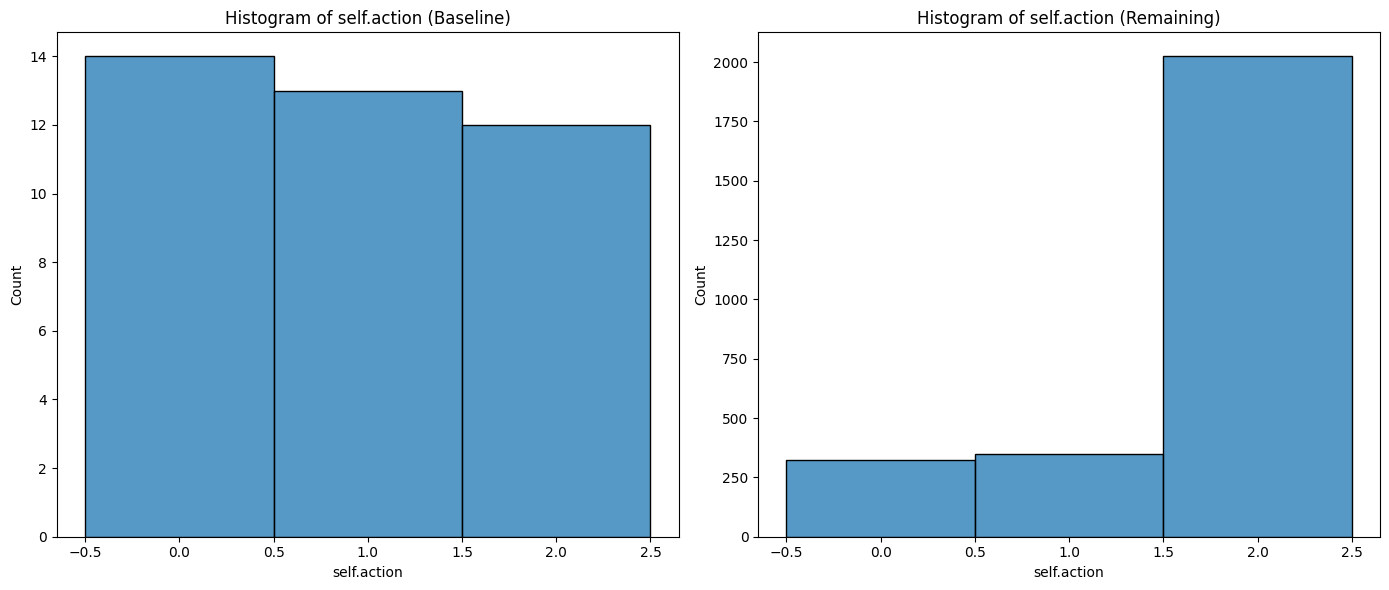

In [25]:
# Plot histograms
plt.figure(figsize=(14, 6))

# Baseline histogram
plt.subplot(1, 2, 1)
sns.histplot(baseline_df['self.action'], discrete=True)
plt.title('Histogram of self.action (Baseline)')

# Remaining histogram
plt.subplot(1, 2, 2)
sns.histplot(remaining_df['self.action'], discrete=True)
plt.title('Histogram of self.action (Remaining)')

plt.tight_layout()
plt.savefig("histograms")
plt.show()

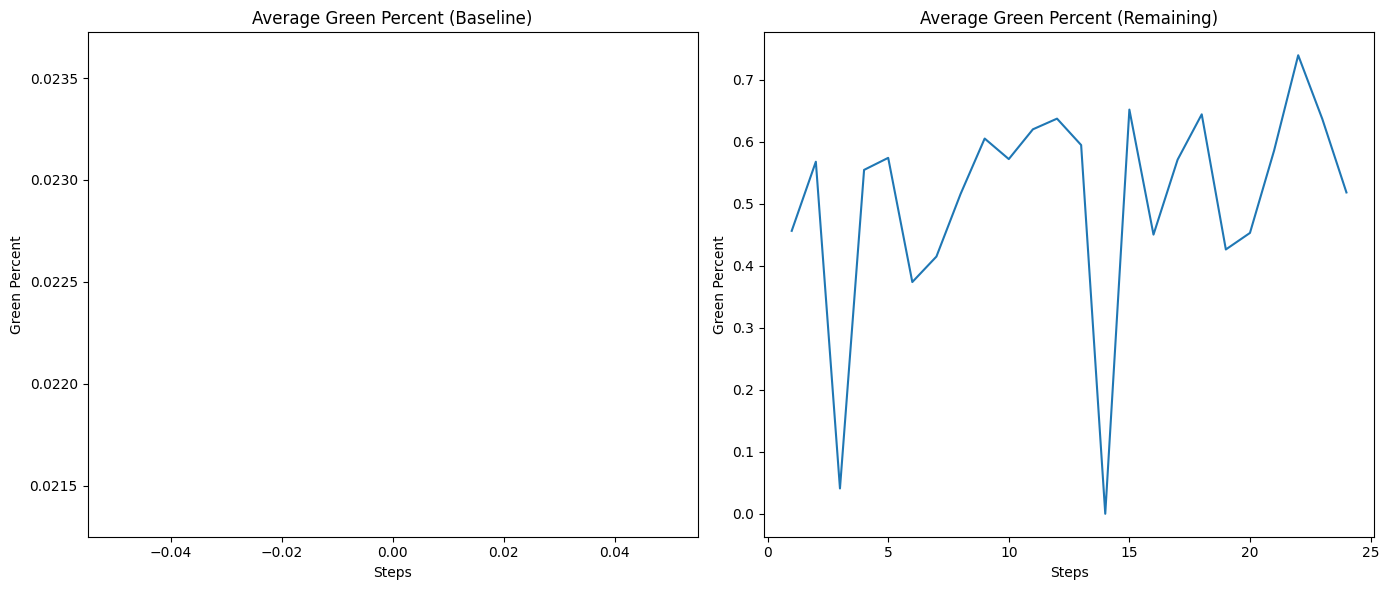

In [28]:
# Calculate the average self.green_percent for each unique epoch
baseline_avg = baseline_df.groupby('epoch')['self.green_percent'].mean().reset_index()
remaining_avg = remaining_df.groupby('epoch')['self.green_percent'].mean().reset_index()

# Plot line plots
plt.figure(figsize=(14, 6))

# Baseline line plot
plt.subplot(1, 2, 1)
sns.lineplot(x='epoch', y='self.green_percent', data=baseline_avg)
plt.title('Average Green Percent (Baseline)')
plt.xlabel('Steps')
plt.ylabel('Green Percent')

# Remaining line plot
plt.subplot(1, 2, 2)
sns.lineplot(x='epoch', y='self.green_percent', data=remaining_avg)
plt.title('Average Green Percent (Remaining)')
plt.xlabel('Steps')
plt.ylabel('Green Percent')

plt.tight_layout()
plt.show()